In [3]:
import numpy as np  #for numeric computations like log, exp, sqrt
import pandas as pd #for reading & storing data, pre=processing
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt #for visualization
import statsmodels.api as sm
from scipy import stats

<AxesSubplot:xlabel='Date'>

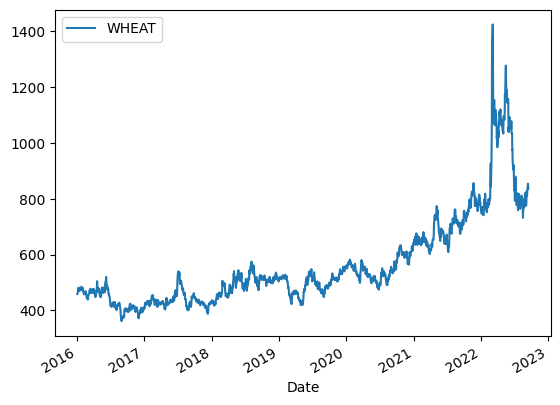

In [95]:
skipy = 12
data = pd.read_csv('city_temperature.csv', index_col='Date', userows=[''],  usecols=['Date', 'WHEAT'], skiprows=[i for i in range(1, 4129)])
data.index = pd.to_datetime(data.index)
data.plot()

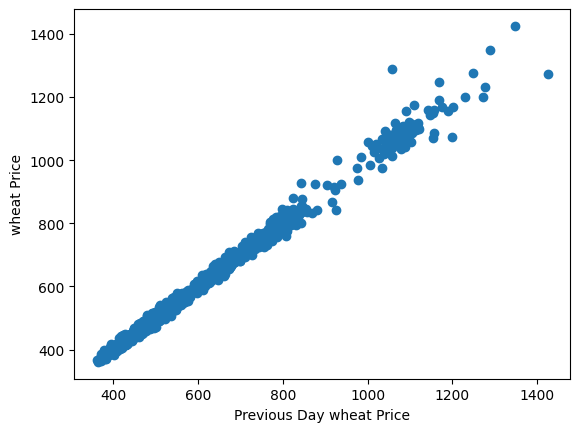

In [96]:
plt.scatter(data.shift(1)[1:], data[1:])
plt.xlabel('Previous Day wheat Price')
plt.ylabel('wheat Price');

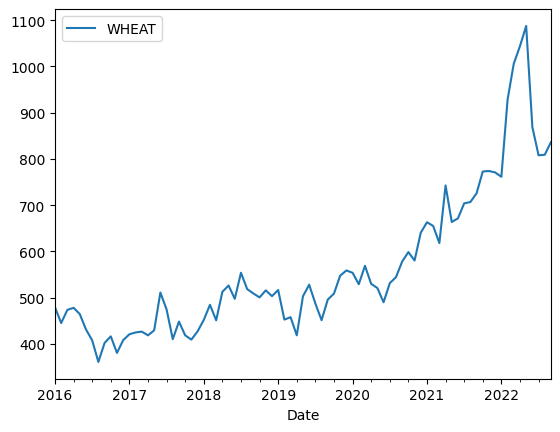

In [98]:
monthly_data = data.resample('M').last()
monthly_data.head()
monthly_data.plot();

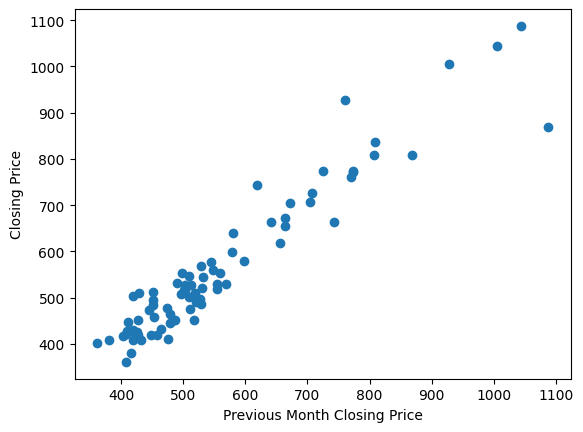

In [100]:
plt.scatter(monthly_data.shift(1)[1:], monthly_data[1:])
plt.xlabel('Previous Month Closing Price')
plt.ylabel('Closing Price');

In [104]:
x = np.arange(len(data))
y = data.values
X = sm.add_constant(x)

array([[1.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00],
       ...,
       [1.000e+00, 1.732e+03],
       [1.000e+00, 1.733e+03],
       [1.000e+00, 1.734e+03]])

In [106]:
lin_reg = sm.OLS(y, X).fit()
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     3134.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:14:50   Log-Likelihood:                -10441.
No. Observations:                1735   AIC:                         2.089e+04
Df Residuals:                    1733   BIC:                         2.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        331.6132      4.773     69.477      0.0

In [108]:
lin_reg.params # w_0, w_1

array([3.31613179e+02, 2.66848243e-01])

In [109]:
intercept=lin_reg.params[0]
coef = lin_reg.params[1]